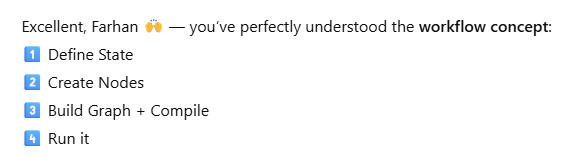

In [25]:
# 🪜 Step 1: Define the State
from typing import TypedDict

class SimpleState(TypedDict):
    count: int

# 🪜 Step 2: Create a Simple Node Function
def add_one(state : SimpleState) -> dict:
    print(f"current count : {state['count']}")
    return {"count":state["count"]+1}

# 🪜 Step 3: Build the Graph

from langgraph.graph import StateGraph, END

# Create a workflow that knows our state structure
workflow = StateGraph(SimpleState)

# Add two nodes that both use the same function
workflow.add_node("A", add_one)
workflow.add_node("B", add_one)

# Connect them in sequence
workflow.add_edge("A", "B")
workflow.add_edge("B", END)

# Tell LangGraph where to start
workflow.set_entry_point("A")

# Finalize (compile) the graph so it can run
graph = workflow.compile()


# 🪜 Step 4: Run It

result = graph.invoke({"count": 0})
print("Final result:", result)



current count : 0
current count : 1
Final result: {'count': 2}


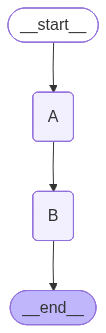

In [26]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

# Mini Project: Simple Workflow Graph

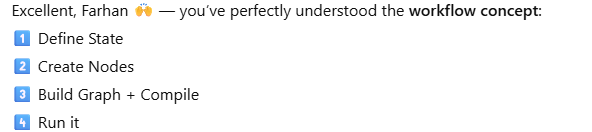

In [ ]:
# step 1. define state 

from typing import TypedDict # TypedDict is a special type hint, that allows you to define a dictionary type with a specific set of keys and their corresponding value types. This provides static type checking for dictionaries, helping to catch errors at development time rather than runtime.
class GraphState(TypedDict):
    user_input : str
    summary_output : str

# step 2. create nodes

## node 1 - take user input
def input_node(state : GraphState) -> dict:
    print(f"User asked : {state['user_input']}")
    return {}  # no change yet

## 🧠 Node 2 — Summarize with LLM
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage

llm = ChatOllama(model="qwen3:0.6b")

def summarizer_node(state: GraphState) -> dict:
    user_text = state["user_input"]
    prompt = f"Summarize this concisely:\n\n{user_text}"
    summary = llm.invoke([HumanMessage(content=prompt)]).content
    print("Summary generated......")
    return {"summary_output": summary}

## 📦 Node 3 — Save Summary (Output)
def save_node(state : GraphState) -> dict:
    print("\n--- FINAL SUMMARY ---")
    print(state["summary_output"])
    return {}


# 🔗 Step 3 – Build and Compile Graph

from langgraph.graph import StateGraph, START,END

workflow = StateGraph(GraphState)

## add nodes
# add_node(name_of_node, function_name_of_node)
workflow.add_node("input_handler", input_node)
workflow.add_node("summarizer", summarizer_node)
workflow.add_node("saver", save_node)

## Connect them in sequence using edge
# input_handler ->  summarizer ->  saver ->  END
# add_edge(source_node, target_node):
workflow.add_edge("input_handler","summarizer")
workflow.add_edge("summarizer","saver")
workflow.add_edge("saver",END)

# ENTRY 
# set_entry_point(name): 
workflow.set_entry_point("input_handler")

# compile all workflow at a single point
app = workflow.compile()

# ▶️ Step 4 – Run It

result = app.invoke({"user_input": "The sky is blue the grass is green A quiet scene a peaceful dream The wind blows soft the trees stand tall A gentle call embracing all The sun shines bright a golden hue On everything both old and new A silent thought a feeling deep While others wake and others sleep The world moves fast a steady beat From busy street to worn retreat No punctuation stops the flow Just simple truths that spirits know A hundred words a quickened pace To find a rhyme in time and space The story told the poem done Beneath the moon beyond the sun"}) # type: ignore
print("\n✅ Final state returned by Agent:")
print(result)


User asked : The sky is blue the grass is green A quiet scene a peaceful dream The wind blows soft the trees stand tall A gentle call embracing all The sun shines bright a golden hue On everything both old and new A silent thought a feeling deep While others wake and others sleep The world moves fast a steady beat From busy street to worn retreat No punctuation stops the flow Just simple truths that spirits know A hundred words a quickened pace To find a rhyme in time and space The story told the poem done Beneath the moon beyond the sun
Summary generated.

--- FINAL SUMMARY ---
The poem describes a peaceful, harmonious scene: a quiet sky, green grass, wind, trees, sun, and a steady rhythm of life. It conveys the balance between nature’s beauty and the world’s quiet pulse, ending with a reflection on the passage of time and the unity of all things.

✅ Final state returned by Agent:
{'user_input': 'The sky is blue the grass is green A quiet scene a peaceful dream The wind blows soft the

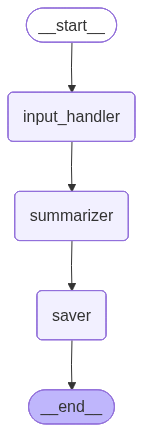

In [28]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [29]:
print(app.get_graph().draw_mermaid())


---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	input_handler(input_handler)
	summarizer(summarizer)
	saver(saver)
	__end__([<p>__end__</p>]):::last
	__start__ --> input_handler;
	input_handler --> summarizer;
	summarizer --> saver;
	saver --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

